# Projeto - Processamento Digital de Imagens
Alunos: Gabriel de Oliveira e Silva Padovani Barreto    RA: 2326221
        Johanna Kirchner                                RA: 2265010

## Parte 1: Definição do tema, coleta e pré-processamento de imagens
Foram escolhidos itens de armarinho como tema dos objetos que formam o dataset. Foram determinadas 10 classes de objetos, cada uma contendo 5 itens dos quais foram capturadas 4 fotos, com fundo e posicionamento variados, combinando dois tipos de fundo com duas posições diferentes. As imagens foram armazenadas em pastas de acordo com sua classe, e nomeadas seguindo a formatação `<CLASSID>-<IMG_SEQUENCE>-V1|V2-B|W.png` 

c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.24). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


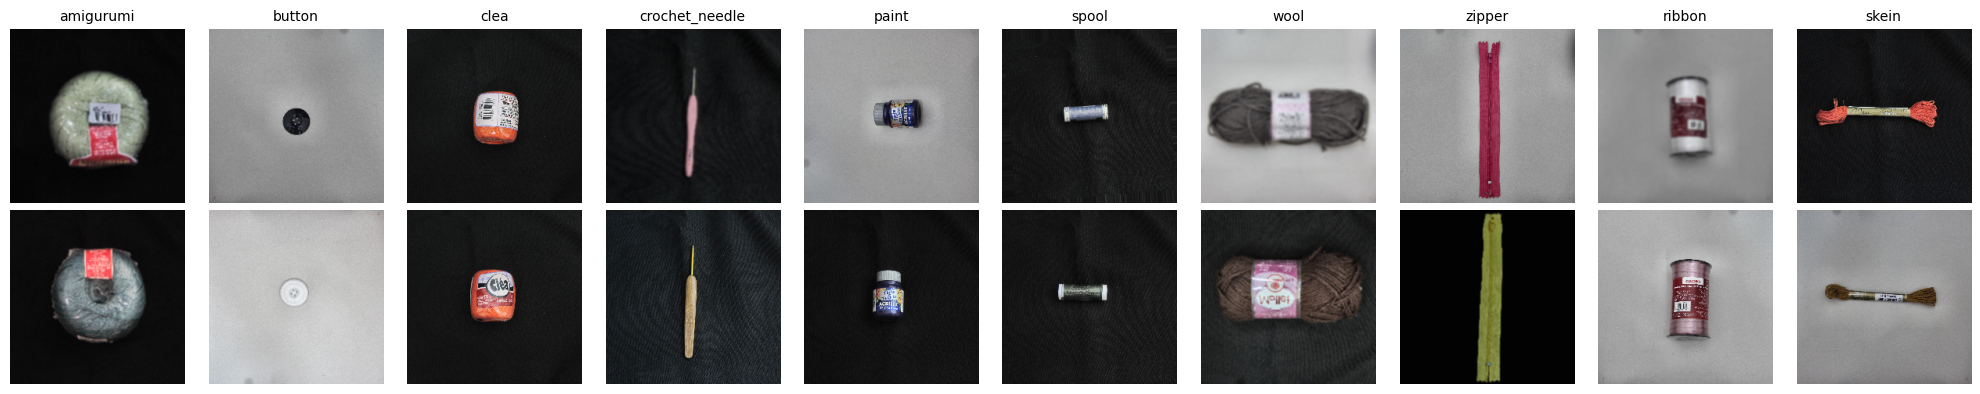

In [ ]:
from utils import plot_class_grid
from trim_dataset import TrimDataset

dataset = TrimDataset('trims_dataset')
plot_class_grid(dataset, 2, 'nobbox')

Para a marcação das imagens, utilizou-se o CVAT, onde foi marcado o objeto de interesse em cada uma das imagens.


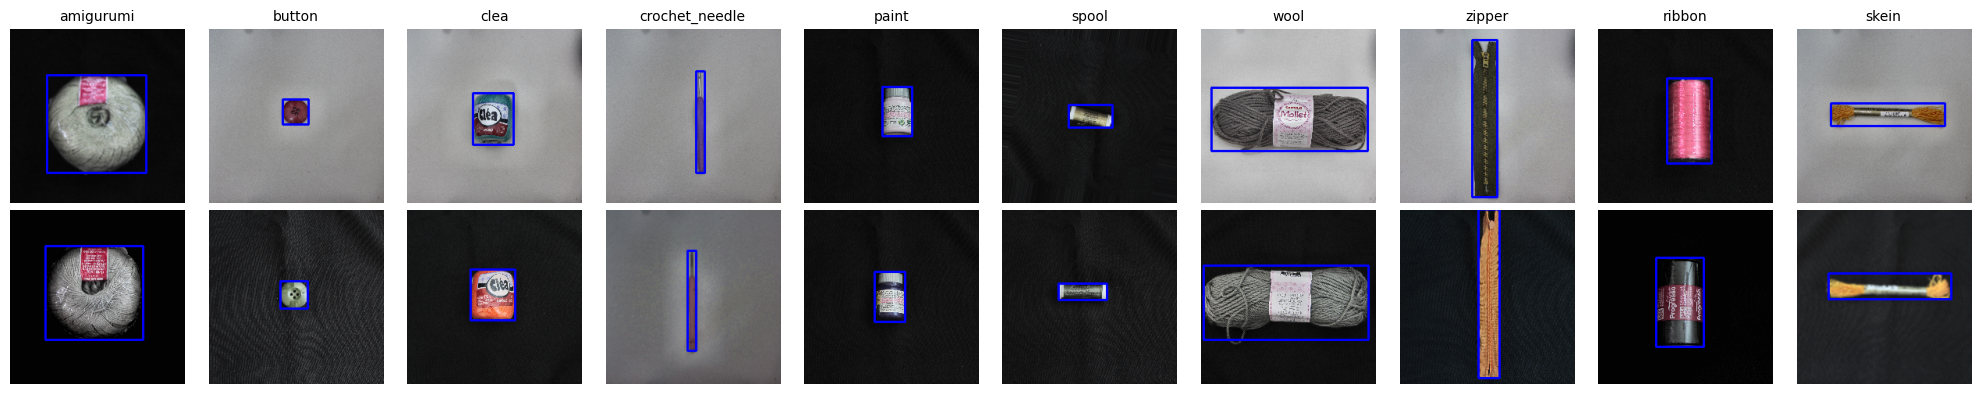

In [2]:
plot_class_grid(dataset, 2, 'bbox')

Para realizar o pré-processamento das imagens, e a subsequente criação do dataset, criou-se a classe `TrimDataset`, que armazena todas as informações relevantes do Dataset e os métodos utilizados para o seu pré-processamento. Tal classe está localizada no arquivo `trims_dataset.py`.
A primeira etapa do pré-processamento foi diminuir a resolução das imagens capturadas, tanto para diminuir o espaço ocupado pelos arquivos quando para acelerar o treinamento do modelo. A resolução das imagens originais foi diminuida de 2112x2112 para 224x224 sem perdas de eficiência do modelo.

Essa primeira etapa é realizada pela função resize_image, aplicada já na instancia de um objeto TrimDataset. Para reduzir o gasto computacional e de memória, as imagens incluídas nos arquivos do projeto já estão com a resolução reduzida, podendo ser encontradas na pasta trims_dataset ou arquivo .zip de mesmo nome.

A segunda etapa envolve a aumentação do dataset, realizada pela função dataset_augmentation dentro da classe TrimDataset. Utilizando a biblioteca Albumentations, tal função aplica uma série de transformações a cada imagem do dataset, sendo elas: Uma dentre quatro transformações geométricas possíveis, ajuste aleatório do brilho e do contraste (50% de chance), blur gaussiano (50% de chance), ajuste da saturação da imagem (50% de chance).

Ao fim dessa etapa, o dataset aumenta de 200 fotos originais para 600 fotos aumentadas, sendo que essa nova versão do dataset é salvo em uma nova pasta denominada `augmented_dataset`.


In [ ]:
dataset.dataset_augmentation()

A terceira e última etapa do pré-processamento é a normalização do histograma das imagens do dataset, realizada pela função `normalize_dataset` dentro da classe TrimDataset. Essa função equalização do histrograma para cada imagem do dataset, salvando as novas imagens em uma outra pasta denominada `normalized_dataset`.

In [ ]:
dataset.normalize_dataset()

Após a etapa de normalização, é necessário recarregar o dataset, isto se dá pois as novas imagens normalizadas são salvas na pasta mas não são armazenadas no objeto `dataset`.

In [ ]:
new_dataset = TrimDataset('normalized_dataset')

Com o dataset normalizado, abaixo podemos ver o protótipo médio, histograma médio, e a variância do histograma de cada classe.

In [ ]:
### Funções

No CVAT, além da marcação das bounding boxes, também realizamos a segmentação de todas as imagens, informação esta que foi carregada para as etapas de augmentation e normalization. Dessa forma, o dataset final contem o Ground Truth de todas as imagens, mesmo que apenas a bounding box seja utilizada para o treinamento do modelo na etapa posterior. O código abaixo gera o ground truth de 5 imagens aleatórias de cada classe.

In [ ]:
plot_class_grid(new_dataset, 5, "gt_mask")

## Parte 2: Treinamento do classificador utilizando CNN
Utilizando a biblioteca TensorFlow, treinamos um modelo classificador baseado em CNN.

In [ ]:
from utils import create_cnn_with_bboxes

input_shape = (224,224,3) # Tamanho fixo das imagens no Dataset
num_classes = 10          # Numero de classes para classificar

model = create_cnn_with_bboxes(input_shape, num_classes) # classificador a ser treinado

Antes de treinarmos o modelo, as imagens devem ser organizadas, separadas e pré-processadas para se adequarem aos formatos utilizados pela biblioteca TensorFlow. Primeiramente, passamos